In [2]:
import pandas as pd
import zipfile
from io import BytesIO
import requests
from os import path, remove

In [3]:
# This downloads zip file for SPSS
def get_spss(url,save_loc='.',convert_cat=False):
    ext = url[-3:]
    res = requests.get(url)
    if ext == 'zip':
        zf = zipfile.ZipFile(BytesIO(res.content))
        spssf = zf.filelist[0].filename
        zz = zf.open(spssf)
        zs = zz.read()
    else:
        zs = BytesIO(res.content)
        spssf = path.basename(url)
    sl = path.join('.',spssf)
    with open(sl, "wb") as sav:
        sav.write(zs)
    df = pd.read_spss(sl,convert_categoricals=convert_cat)
    remove(sl)
    return df

In [4]:
# creating urls
base_url = 'https://ftp.cdc.gov/pub/health_statistics/nchs/dataset_documentation/NHAMCS/spss/'
# files = ['ed02-spss.zip',
#          'ed03-spss.zip',
#          'ed04-spss.zip',
#          'ed05-sps.zip',
#          'ed06-spss.zip',
#          'ed07-spss.zip',
#          'ed08-spss.zip',
#          'ed09-spss.zip',
#          'ed2010-spss.zip',
#          'ed2011-spss.zip',
#          'ed2012-spss.zip',
#          'ed2013-spss.zip',
#          'ed2014-spss.zip',
#          'ed2015-spss.zip',
#          'ed2016-spss.zip',
#          'ed2017-spss.zip',
#          'ed2018-spss.zip',
#          'ed2019-spss.zip',
#          'ed2019-spss.zip',
#          'ed2020-spss.zip',
#          'ed2021-spss.zip']
files = ['ed2021-spss.zip']
urls = [base_url + f for f in files]

In [5]:
def get_data():
    res_data = []
    for u in urls:
        res_data.append(get_spss(u))
    for r in res_data:
        r.columns = [v.upper() for v in list(r)]
    vars = []
    for i,d in enumerate(res_data):
        year = i + 2001
        vars += list(d)
    vars = list(set(vars))
    vars.sort()
    vars = pd.DataFrame(vars,columns=['V'])
    for i,d in enumerate(res_data):
        year = i + 2001
        uc = [v.upper() for v in list(d)]
        vars[str(year)] = 1*vars['V'].isin(uc)
    return res_data, vars

In [6]:
rd, va = get_data()
all_data = pd.concat(rd,axis=0,ignore_index=True)

In [7]:
all_data

,VMONTH,VDAYR,ARRTIME,WAITTIME,LOV,AGE,AGER,AGEDAYS,RESIDNCE,SEX,...,RX30V3C3,RX30V3C4,SETTYPE,YEAR,CSTRATM,CPSUM,PATWT,EDWT,BOARDED,COVID_VALIDATION
0,8.0,2.0,0003,-9.0,-9.0,36.0,3.0,-7.0,1.0,1.0,...,,,3.0,2021.0,20121201.0,100031.0,8503.95156,4.46516,-7.0,-7.0
1,8.0,2.0,0655,34.0,333.0,26.0,3.0,-7.0,1.0,2.0,...,,,3.0,2021.0,20121201.0,100031.0,8503.95156,NaN,-7.0,-7.0
2,8.0,2.0,1127,17.0,1315.0,82.0,6.0,-7.0,1.0,1.0,...,,,3.0,2021.0,20121201.0,100031.0,8503.95156,NaN,44.0,-7.0
3,8.0,3.0,0421,25.0,726.0,23.0,2.0,-7.0,1.0,1.0,...,,,3.0,2021.0,20121201.0,100031.0,8503.95156,NaN,-7.0,-7.0
4,9.0,4.0,1244,35.0,585.0,52.0,4.0,-7.0,1.0,1.0,...,,,3.0,2021.0,20121201.0,100031.0,8503.95156,NaN,-7.0,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16202,2.0,7.0,2110,24.0,779.0,8.0,1.0,-7.0,1.0,2.0,...,,,3.0,2021.0,40400000.0,40.0,5590.83951,NaN,-7.0,-7.0
16203,2.0,1.0,0539,32.0,278.0,2.0,1.0,-7.0,1.0,1.0,...,,,3.0,2021.0,40400000.0,40.0,5590.83951,NaN,-7.0,-7.0
16204,2.0,1.0,1228,18.0,169.0,1.0,1.0,-7.0,1.0,2.0,...,,,3.0,2021.0,40400000.0,40.0,5590.83951,NaN,-7.0,-7.0
16205,2.0,1.0,1644,25.0,247.0,4.0,1.0,-7.0,1.0,1.0,...,,,3.0,2021.0,40400000.0,40.0,5590.83951,NaN,-7.0,-7.0


In [8]:
# list all column names
df_columns = all_data.columns.tolist()
print(df_columns)
len(df_columns) # 914

['VMONTH', 'VDAYR', 'ARRTIME', 'WAITTIME', 'LOV', 'AGE', 'AGER', 'AGEDAYS', 'RESIDNCE', 'SEX', 'ETHUN', 'ETHIM', 'RACEUN', 'RACER', 'RACERETH', 'ARREMS', 'AMBTRANSFER', 'NOPAY', 'PAYPRIV', 'PAYMCARE', 'PAYMCAID', 'PAYWKCMP', 'PAYSELF', 'PAYNOCHG', 'PAYOTH', 'PAYDK', 'PAYTYPER', 'TEMPF', 'PULSE', 'RESPR', 'BPSYS', 'BPDIAS', 'POPCT', 'IMMEDR', 'PAINSCALE', 'SEEN72', 'RFV1', 'RFV2', 'RFV3', 'RFV4', 'RFV5', 'RFV13D', 'RFV23D', 'RFV33D', 'RFV43D', 'RFV53D', 'EPISODE', 'INJURY', 'INJPOISAD', 'INJURY72', 'INTENT15', 'INJURY_ENC', 'CAUSE1', 'CAUSE2', 'CAUSE3', 'DIAG1', 'DIAG2', 'DIAG3', 'DIAG4', 'DIAG5', 'PRDIAG1', 'PRDIAG2', 'PRDIAG3', 'PRDIAG4', 'PRDIAG5', 'ETOHAB', 'ALZHD', 'ASTHMA', 'CANCER', 'CEBVD', 'CKD', 'COPD', 'CHF', 'CAD', 'DEPRN', 'DIABTYP1', 'DIABTYP2', 'DIABTYP0', 'ESRD', 'HPE', 'EDHIV', 'HYPLIPID', 'HTN', 'OBESITY', 'OSA', 'OSTPRSIS', 'SUBSTAB', 'NOCHRON', 'TOTCHRON', 'DIAGSCRN', 'ABG', 'BAC', 'BMP', 'BNP', 'BUNCREAT', 'CARDENZ', 'CBC', 'CMP', 'BLOODCX', 'TRTCX', 'URINECX', 'WOU

912

In [11]:
# categorize columns

# time information of the visit
col_visit_time = ['VMONTH', 'VDAYR', 'ARRTIME', 'WAITTIME', 'LOV']

# demographic information
col_demographic = ['AGE', 'AGER', 'AGEDAYS', 'RESIDNCE', 'SEX', 'ETHUN', 'ETHIM', 'RACEUN', 'RACER', 'RACERETH']

# ambulance
col_ambulance = ['ARREMS', 'AMBTRANSFER']

# insurance / payment information
col_insurance = ['NOPAY', 'PAYPRIV', 'PAYMCARE', 'PAYMCAID', 'PAYWKCMP', 'PAYSELF', 'PAYNOCHG', 'PAYOTH', 'PAYDK', 'PAYTYPER']

# vital signs
col_vital = ['TEMPF', 'PULSE', 'RESPR', 'BPSYS', 'BPDIAS', 'POPCT', 'IMMEDR', 'PAINSCALE', 'SEEN72']

# reason for visit
col_rfv = [ 'RFV1', 'RFV2', 'RFV3', 'RFV4', 'RFV5', 'RFV13D', 'RFV23D', 'RFV33D', 'RFV43D', 'RFV53D', 'EPISODE']

# injury
col_injury = ['INJURY', 'INJPOISAD', 'INJURY72', 'INTENT15', 'INJURY_ENC', 'CAUSE1', 'CAUSE2', 'CAUSE3']

# diagnose
col_diag = ['DIAG1', 'DIAG2', 'DIAG3', 'DIAG4', 'DIAG5', 'PRDIAG1', 'PRDIAG2', 'PRDIAG3', 'PRDIAG4', 'PRDIAG5']

# chronic condition
col_chron = ['ETOHAB', 'ALZHD', 'ASTHMA', 'CANCER', 'CEBVD', 'CKD', 'COPD', 'CHF', 'CAD', 'DEPRN', 'DIABTYP1', 'DIABTYP2', 'DIABTYP0', 'ESRD', 'HPE', 'EDHIV', 'HYPLIPID', 'HTN', 'OBESITY', 'OSA', 'OSTPRSIS', 'SUBSTAB', 'NOCHRON', 'TOTCHRON']

# diagnose service
col_diag_scrn = ['DIAGSCRN', 'ABG', 'BAC', 'BMP', 'BNP', 'BUNCREAT', 'CARDENZ', 'CBC', 'CMP', 'BLOODCX', 'TRTCX', 'URINECX', 'WOUNDCX', 'OTHCX', 'DDIMER', 'ELECTROL', 'GLUCOSE', 'LACTATE', 'LFT', 'PTTINR', 'OTHERBLD', 'CARDMON', 'EKG', 'HIVTEST', 'FLUTEST', 'PREGTEST', 'TOXSCREN', 'URINE', 'OTHRTEST', 'ANYIMAGE', 'XRAY', 'CATSCAN', 'CTCONTRAST', 'CTAB', 'CTCHEST', 'CTHEAD', 'CTOTHER', 'CTUNK', 'MRI', 'MRICONTRAST', 'ULTRASND', 'OTHIMAGE', 'TOTDIAG']

# procedures
col_proc = ['PROC', 'BPAP', 'BLADCATH', 'CASTSPLINT', 'CENTLINE', 'CPR', 'ENDOINT', 'INCDRAIN', 'IVFLUIDS', 'LUMBAR', 'NEBUTHER', 'PELVIC', 'SKINADH', 'SUTURE', 'OTHPROC', 'TOTPROC']

# medication and immunization
col_med_imm = ['MED', 'MED1', 'MED2', 'MED3', 'MED4', 'MED5', 'MED6', 'MED7', 'MED8', 'MED9', 'MED10', 'MED11', 'MED12', 'MED13', 'MED14', 'MED15', 'MED16', 'MED17', 'MED18', 'MED19', 'MED20', 'MED21', 'MED22', 'MED23', 'MED24', 'MED25', 'MED26', 'MED27', 'MED28', 'MED29', 'MED30', 'GPMED1', 'GPMED2', 'GPMED3', 'GPMED4', 'GPMED5', 'GPMED6', 'GPMED7', 'GPMED8', 'GPMED9', 'GPMED10', 'GPMED11', 'GPMED12', 'GPMED13', 'GPMED14', 'GPMED15', 'GPMED16', 'GPMED17', 'GPMED18', 'GPMED19', 'GPMED20', 'GPMED21', 'GPMED22', 'GPMED23', 'GPMED24', 'GPMED25', 'GPMED26', 'GPMED27', 'GPMED28', 'GPMED29', 'GPMED30', 'NUMGIV', 'NUMDIS', 'NUMMED']

# vitals taken after triage
col_vital_d = ['VITALSD', 'TEMPDF', 'PULSED', 'RESPRD', 'BPSYSD', 'BPDIASD']

# providers seen
col_provider = ['NOPROVID', 'ATTPHYS', 'RESINT', 'CONSULT', 'RNLPN', 'NURSEPR', 'PHYSASST', 'EMT', 'MHPROV', 'OTHPROV']

# visit disposition
col_disposition = ['NODISP', 'NOFU', 'RETRNED', 'RETREFFU', 'LWBS', 'LBTC', 'LEFTAMA', 'DOA', 'DIEDED', 'TRANNH', 'TRANPSYC', 'TRANOTH', 'ADMITHOS', 'OBSHOS', 'OBSDIS', 'OTHDISP']

# hospital status
col_hospital = ['ADMIT', 'ADMTPHYS', 'LOS', 'HDDIAG1', 'HDDIAG2', 'HDDIAG3', 'HDDIAG4', 'HDDIAG5', 'HDSTAT', 'ADISP', 'OBSSTAY', 'STAY24']

# data imputed
col_impute = ['AGEFL', 'BDATEFL', 'SEXFL', 'ETHNICFL', 'RACERFL']

# identifier
col_id = ['HOSPCODE', 'PATCODE']

# facility capability
col_facility = ['EMRED', 'HHSMUE', 'EHRINSE', 'EDPRIM', 'EDINFO', 'OBSCLIN', 'OBSSEP', 'OBSPHYSED', 'OBSHOSP', 'OBSPHYSOT', 'OBSPHYSUN', 'BOARD', 'BOARDHOS', 'AMBDIV', 'TOTHRDIVR', 'REGDIV', 'ADMDIV', 'INCSHX', 'INCPHYS', 'EXPSPACE', 'BEDREG', 'KIOSELCHK', 'CATRIAGE', 'IMBED', 'ADVTRIAG', 'PHYSPRACTRIA', 'FASTTRAK', 'EDPTOR', 'DASHBORD', 'RFID', 'WIRELESS', 'ZONENURS', 'POOLNURS', 'SURGDAY', 'BEDCZAR', 'BEDDATA', 'HLIST', 'HLISTED', 'EMEDRES', 'REGION', 'MSA']

# drug
col_drug = [
    'DRUGID1', 'PRESCR1', 'CONTSUB1', 'COMSTAT1', 'RX1CAT1', 'RX1CAT2', 'RX1CAT3', 'RX1CAT4', 'RX1V1C1', 'RX1V1C2', 'RX1V1C3', 'RX1V1C4', 'RX1V2C1', 'RX1V2C2', 'RX1V2C3', 'RX1V2C4', 'RX1V3C1', 'RX1V3C2', 'RX1V3C3', 'RX1V3C4', 
    'DRUGID2', 'PRESCR2', 'CONTSUB2', 'COMSTAT2', 'RX2CAT1', 'RX2CAT2', 'RX2CAT3', 'RX2CAT4', 'RX2V1C1', 'RX2V1C2', 'RX2V1C3', 'RX2V1C4', 'RX2V2C1', 'RX2V2C2', 'RX2V2C3', 'RX2V2C4', 'RX2V3C1', 'RX2V3C2', 'RX2V3C3', 'RX2V3C4', 
    'DRUGID3', 'PRESCR3', 'CONTSUB3', 'COMSTAT3', 'RX3CAT1', 'RX3CAT2', 'RX3CAT3', 'RX3CAT4', 'RX3V1C1', 'RX3V1C2', 'RX3V1C3', 'RX3V1C4', 'RX3V2C1', 'RX3V2C2', 'RX3V2C3', 'RX3V2C4', 'RX3V3C1', 'RX3V3C2', 'RX3V3C3', 'RX3V3C4', 
    'DRUGID4', 'PRESCR4', 'CONTSUB4', 'COMSTAT4', 'RX4CAT1', 'RX4CAT2', 'RX4CAT3', 'RX4CAT4', 'RX4V1C1', 'RX4V1C2', 'RX4V1C3', 'RX4V1C4', 'RX4V2C1', 'RX4V2C2', 'RX4V2C3', 'RX4V2C4', 'RX4V3C1', 'RX4V3C2', 'RX4V3C3', 'RX4V3C4', 
    'DRUGID5', 'PRESCR5', 'CONTSUB5', 'COMSTAT5', 'RX5CAT1', 'RX5CAT2', 'RX5CAT3', 'RX5CAT4', 'RX5V1C1', 'RX5V1C2', 'RX5V1C3', 'RX5V1C4', 'RX5V2C1', 'RX5V2C2', 'RX5V2C3', 'RX5V2C4', 'RX5V3C1', 'RX5V3C2', 'RX5V3C3', 'RX5V3C4', 
    'DRUGID6', 'PRESCR6', 'CONTSUB6', 'COMSTAT6', 'RX6CAT1', 'RX6CAT2', 'RX6CAT3', 'RX6CAT4', 'RX6V1C1', 'RX6V1C2', 'RX6V1C3', 'RX6V1C4', 'RX6V2C1', 'RX6V2C2', 'RX6V2C3', 'RX6V2C4', 'RX6V3C1', 'RX6V3C2', 'RX6V3C3', 'RX6V3C4', 
    'DRUGID7', 'PRESCR7', 'CONTSUB7', 'COMSTAT7', 'RX7CAT1', 'RX7CAT2', 'RX7CAT3', 'RX7CAT4', 'RX7V1C1', 'RX7V1C2', 'RX7V1C3', 'RX7V1C4', 'RX7V2C1', 'RX7V2C2', 'RX7V2C3', 'RX7V2C4', 'RX7V3C1', 'RX7V3C2', 'RX7V3C3', 'RX7V3C4', 
    'DRUGID8', 'PRESCR8', 'CONTSUB8', 'COMSTAT8', 'RX8CAT1', 'RX8CAT2', 'RX8CAT3', 'RX8CAT4', 'RX8V1C1', 'RX8V1C2', 'RX8V1C3', 'RX8V1C4', 'RX8V2C1', 'RX8V2C2', 'RX8V2C3', 'RX8V2C4', 'RX8V3C1', 'RX8V3C2', 'RX8V3C3', 'RX8V3C4', 
    'DRUGID9', 'PRESCR9', 'CONTSUB9', 'COMSTAT9', 'RX9CAT1', 'RX9CAT2', 'RX9CAT3', 'RX9CAT4', 'RX9V1C1', 'RX9V1C2', 'RX9V1C3', 'RX9V1C4', 'RX9V2C1', 'RX9V2C2', 'RX9V2C3', 'RX9V2C4', 'RX9V3C1', 'RX9V3C2', 'RX9V3C3', 'RX9V3C4', 
    'DRUGID10', 'PRESCR10', 'CONTSUB10', 'COMSTAT10', 'RX10CAT1', 'RX10CAT2', 'RX10CAT3', 'RX10CAT4', 'RX10V1C1', 'RX10V1C2', 'RX10V1C3', 'RX10V1C4', 'RX10V2C1', 'RX10V2C2', 'RX10V2C3', 'RX10V2C4', 'RX10V3C1', 'RX10V3C2', 'RX10V3C3', 'RX10V3C4', 
    'DRUGID11', 'PRESCR11', 'CONTSUB11', 'COMSTAT11', 'RX11CAT1', 'RX11CAT2', 'RX11CAT3', 'RX11CAT4', 'RX11V1C1', 'RX11V1C2', 'RX11V1C3', 'RX11V1C4', 'RX11V2C1', 'RX11V2C2', 'RX11V2C3', 'RX11V2C4', 'RX11V3C1', 'RX11V3C2', 'RX11V3C3', 'RX11V3C4', 
    'DRUGID12', 'PRESCR12', 'CONTSUB12', 'COMSTAT12', 'RX12CAT1', 'RX12CAT2', 'RX12CAT3', 'RX12CAT4', 'RX12V1C1', 'RX12V1C2', 'RX12V1C3', 'RX12V1C4', 'RX12V2C1', 'RX12V2C2', 'RX12V2C3', 'RX12V2C4', 'RX12V3C1', 'RX12V3C2', 'RX12V3C3', 'RX12V3C4', 
    'DRUGID13', 'PRESCR13', 'CONTSUB13', 'COMSTAT13', 'RX13CAT1', 'RX13CAT2', 'RX13CAT3', 'RX13CAT4', 'RX13V1C1', 'RX13V1C2', 'RX13V1C3', 'RX13V1C4', 'RX13V2C1', 'RX13V2C2', 'RX13V2C3', 'RX13V2C4', 'RX13V3C1', 'RX13V3C2', 'RX13V3C3', 'RX13V3C4', 
    'DRUGID14', 'PRESCR14', 'CONTSUB14', 'COMSTAT14', 'RX14CAT1', 'RX14CAT2', 'RX14CAT3', 'RX14CAT4', 'RX14V1C1', 'RX14V1C2', 'RX14V1C3', 'RX14V1C4', 'RX14V2C1', 'RX14V2C2', 'RX14V2C3', 'RX14V2C4', 'RX14V3C1', 'RX14V3C2', 'RX14V3C3', 'RX14V3C4', 
    'DRUGID15', 'PRESCR15', 'CONTSUB15', 'COMSTAT15', 'RX15CAT1', 'RX15CAT2', 'RX15CAT3', 'RX15CAT4', 'RX15V1C1', 'RX15V1C2', 'RX15V1C3', 'RX15V1C4', 'RX15V2C1', 'RX15V2C2', 'RX15V2C3', 'RX15V2C4', 'RX15V3C1', 'RX15V3C2', 'RX15V3C3', 'RX15V3C4', 
    'DRUGID16', 'PRESCR16', 'CONTSUB16', 'COMSTAT16', 'RX16CAT1', 'RX16CAT2', 'RX16CAT3', 'RX16CAT4', 'RX16V1C1', 'RX16V1C2', 'RX16V1C3', 'RX16V1C4', 'RX16V2C1', 'RX16V2C2', 'RX16V2C3', 'RX16V2C4', 'RX16V3C1', 'RX16V3C2', 'RX16V3C3', 'RX16V3C4', 
    'DRUGID17', 'PRESCR17', 'CONTSUB17', 'COMSTAT17', 'RX17CAT1', 'RX17CAT2', 'RX17CAT3', 'RX17CAT4', 'RX17V1C1', 'RX17V1C2', 'RX17V1C3', 'RX17V1C4', 'RX17V2C1', 'RX17V2C2', 'RX17V2C3', 'RX17V2C4', 'RX17V3C1', 'RX17V3C2', 'RX17V3C3', 'RX17V3C4', 
    'DRUGID18', 'PRESCR18', 'CONTSUB18', 'COMSTAT18', 'RX18CAT1', 'RX18CAT2', 'RX18CAT3', 'RX18CAT4', 'RX18V1C1', 'RX18V1C2', 'RX18V1C3', 'RX18V1C4', 'RX18V2C1', 'RX18V2C2', 'RX18V2C3', 'RX18V2C4', 'RX18V3C1', 'RX18V3C2', 'RX18V3C3', 'RX18V3C4', 
    'DRUGID19', 'PRESCR19', 'CONTSUB19', 'COMSTAT19', 'RX19CAT1', 'RX19CAT2', 'RX19CAT3', 'RX19CAT4', 'RX19V1C1', 'RX19V1C2', 'RX19V1C3', 'RX19V1C4', 'RX19V2C1', 'RX19V2C2', 'RX19V2C3', 'RX19V2C4', 'RX19V3C1', 'RX19V3C2', 'RX19V3C3', 'RX19V3C4', 
    'DRUGID20', 'PRESCR20', 'CONTSUB20', 'COMSTAT20', 'RX20CAT1', 'RX20CAT2', 'RX20CAT3', 'RX20CAT4', 'RX20V1C1', 'RX20V1C2', 'RX20V1C3', 'RX20V1C4', 'RX20V2C1', 'RX20V2C2', 'RX20V2C3', 'RX20V2C4', 'RX20V3C1', 'RX20V3C2', 'RX20V3C3', 'RX20V3C4', 
    'DRUGID21', 'PRESCR21', 'CONTSUB21', 'COMSTAT21', 'RX21CAT1', 'RX21CAT2', 'RX21CAT3', 'RX21CAT4', 'RX21V1C1', 'RX21V1C2', 'RX21V1C3', 'RX21V1C4', 'RX21V2C1', 'RX21V2C2', 'RX21V2C3', 'RX21V2C4', 'RX21V3C1', 'RX21V3C2', 'RX21V3C3', 'RX21V3C4', 
    'DRUGID22', 'PRESCR22', 'CONTSUB22', 'COMSTAT22', 'RX22CAT1', 'RX22CAT2', 'RX22CAT3', 'RX22CAT4', 'RX22V1C1', 'RX22V1C2', 'RX22V1C3', 'RX22V1C4', 'RX22V2C1', 'RX22V2C2', 'RX22V2C3', 'RX22V2C4', 'RX22V3C1', 'RX22V3C2', 'RX22V3C3', 'RX22V3C4', 
    'DRUGID23', 'PRESCR23', 'CONTSUB23', 'COMSTAT23', 'RX23CAT1', 'RX23CAT2', 'RX23CAT3', 'RX23CAT4', 'RX23V1C1', 'RX23V1C2', 'RX23V1C3', 'RX23V1C4', 'RX23V2C1', 'RX23V2C2', 'RX23V2C3', 'RX23V2C4', 'RX23V3C1', 'RX23V3C2', 'RX23V3C3', 'RX23V3C4', 
    'DRUGID24', 'PRESCR24', 'CONTSUB24', 'COMSTAT24', 'RX24CAT1', 'RX24CAT2', 'RX24CAT3', 'RX24CAT4', 'RX24V1C1', 'RX24V1C2', 'RX24V1C3', 'RX24V1C4', 'RX24V2C1', 'RX24V2C2', 'RX24V2C3', 'RX24V2C4', 'RX24V3C1', 'RX24V3C2', 'RX24V3C3', 'RX24V3C4', 
    'DRUGID25', 'PRESCR25', 'CONTSUB25', 'COMSTAT25', 'RX25CAT1', 'RX25CAT2', 'RX25CAT3', 'RX25CAT4', 'RX25V1C1', 'RX25V1C2', 'RX25V1C3', 'RX25V1C4', 'RX25V2C1', 'RX25V2C2', 'RX25V2C3', 'RX25V2C4', 'RX25V3C1', 'RX25V3C2', 'RX25V3C3', 'RX25V3C4', 
    'DRUGID26', 'PRESCR26', 'CONTSUB26', 'COMSTAT26', 'RX26CAT1', 'RX26CAT2', 'RX26CAT3', 'RX26CAT4', 'RX26V1C1', 'RX26V1C2', 'RX26V1C3', 'RX26V1C4', 'RX26V2C1', 'RX26V2C2', 'RX26V2C3', 'RX26V2C4', 'RX26V3C1', 'RX26V3C2', 'RX26V3C3', 'RX26V3C4', 
    'DRUGID27', 'PRESCR27', 'CONTSUB27', 'COMSTAT27', 'RX27CAT1', 'RX27CAT2', 'RX27CAT3', 'RX27CAT4', 'RX27V1C1', 'RX27V1C2', 'RX27V1C3', 'RX27V1C4', 'RX27V2C1', 'RX27V2C2', 'RX27V2C3', 'RX27V2C4', 'RX27V3C1', 'RX27V3C2', 'RX27V3C3', 'RX27V3C4', 
    'DRUGID28', 'PRESCR28', 'CONTSUB28', 'COMSTAT28', 'RX28CAT1', 'RX28CAT2', 'RX28CAT3', 'RX28CAT4', 'RX28V1C1', 'RX28V1C2', 'RX28V1C3', 'RX28V1C4', 'RX28V2C1', 'RX28V2C2', 'RX28V2C3', 'RX28V2C4', 'RX28V3C1', 'RX28V3C2', 'RX28V3C3', 'RX28V3C4', 
    'DRUGID29', 'PRESCR29', 'CONTSUB29', 'COMSTAT29', 'RX29CAT1', 'RX29CAT2', 'RX29CAT3', 'RX29CAT4', 'RX29V1C1', 'RX29V1C2', 'RX29V1C3', 'RX29V1C4', 'RX29V2C1', 'RX29V2C2', 'RX29V2C3', 'RX29V2C4', 'RX29V3C1', 'RX29V3C2', 'RX29V3C3', 'RX29V3C4', 
    'DRUGID30', 'PRESCR30', 'CONTSUB30', 'COMSTAT30', 'RX30CAT1', 'RX30CAT2', 'RX30CAT3', 'RX30CAT4', 'RX30V1C1', 'RX30V1C2', 'RX30V1C3', 'RX30V1C4', 'RX30V2C1', 'RX30V2C2', 'RX30V2C3', 'RX30V2C4', 'RX30V3C1', 'RX30V3C2', 'RX30V3C3', 'RX30V3C4'
]

# survey setting
col_survey_setting = ['SETTYPE', 'YEAR']

# design variable
col_survey_design = ['CSTRATM', 'CPSUM']

# weighting
col_weight = ['PATWT', 'EDWT']

# other
col_other = ['BOARDED', 'COVID_VALIDATION']


In [16]:
# create age group attribute

# define age groups
age_bins = [-1, 14, 24, 44, 64, 74, float('inf')]
age_labels = ['0-14', '15-24', '25-44', '45-64', '65-74', '>75']

# Create column 'age_group' based on the bins
all_data['age_group'] = pd.cut(all_data['AGE'], bins=age_bins, labels=age_labels, right=True)



<Axes: >

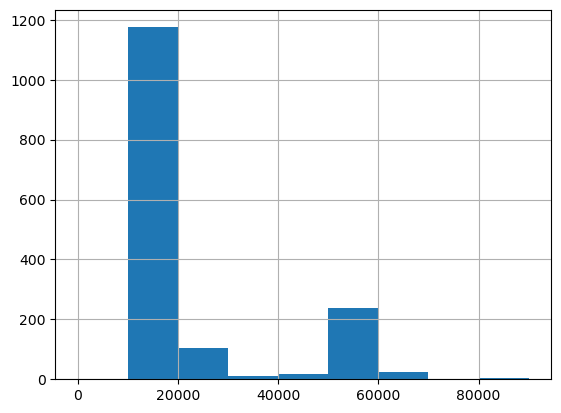

In [24]:
# check reason for visit
df_rfv = all_data[col_demographic+col_rfv+['age_group']]
df_rfv[ (df_rfv['age_group']=='>75')]['RFV1'].hist(bins=[0,10000,20000,30000,40000,50000,60000,70000,80000,90000])

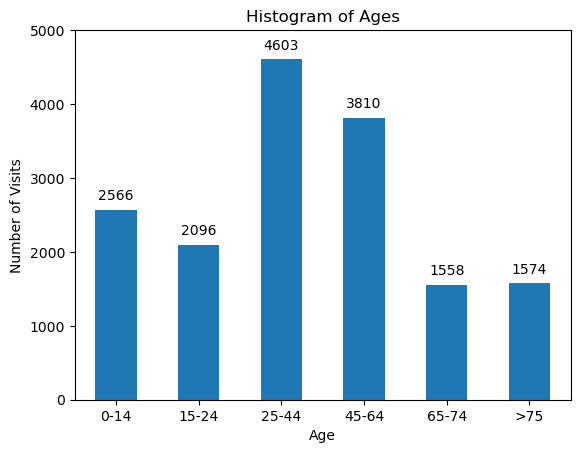

In [12]:
# plot age group
import matplotlib.pyplot as plt

# create age group attribute
age_group_counts = all_data['age_group'].value_counts().reindex(['0-14', '15-24', '25-44', '45-64', '65-74', '>75'])
ax = age_group_counts.plot(kind = 'bar')
plt.title('Histogram of Ages')
plt.xlabel('Age')
plt.ylabel('Number of Visits')

# let x axis label be shown horizontally
plt.xticks(rotation=0)

# Define the y-axis range
plt.ylim(0, 5000)  # Change 0 and 100 to the desired min and max values

# Display the value of each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')
    
# Show the plot
plt.show()

In [13]:
all_data['age_group'].value_counts().reindex(['0-14', '15-24', '25-44', '45-64', '65-74', '>75'])

age_group
0-14     2566
15-24    2096
25-44    4603
45-64    3810
65-74    1558
>75      1574
Name: count, dtype: int64

In [14]:
# plot gender distribution

# Map SEX value 1 and 2 to Female and Male
gender = { 1:"Female",
            2:"Male"}
 
# combine this new data with existing DataFrame
all_data["Gender"] = all_data["SEX"].map(gender)
all_data['Gender'].value_counts()

Gender
Female    8583
Male      7624
Name: count, dtype: int64

<font color="cyan"> How to understand patient code, why there are only 185 uniq values? It means there are only 185 patients in this survey data of 2021? </font>

Diabetes related attributes
- 71    DIATYPE1
- 72    DIATYPE2
- 73    DIATYPE0

Reason for visit classification tabular listing
- General symptoms 1001-1099
- 2205 Diabetes mellitus
- 2735 diagnosed complications of pregnancy, including diabetes during pregnancy
- 3310 Glucose level determination, includes: test for diabetes
- 4605.3 Family history of diabetes

In [16]:
all_data[all_data['DIABTYP1']==1]['age_group'].value_counts().sort_index()

age_group
0-14      7
15-24    18
25-44    40
45-64    28
65-74     7
>75      12
Name: count, dtype: int64

In [18]:
all_data[ (all_data['DIABTYP1']==1) & ((all_data['RFV1']==22050) | (all_data['RFV2']==22050) | (all_data['RFV3']==22050) | (all_data['RFV4']==22050) | (all_data['RFV5']==22050))]

,VMONTH,VDAYR,ARRTIME,WAITTIME,LOV,AGE,AGER,AGEDAYS,RESIDNCE,SEX,...,SETTYPE,YEAR,CSTRATM,CPSUM,PATWT,EDWT,BOARDED,COVID_VALIDATION,age_group,Gender
2681,7.0,3.0,0859,213.0,403.0,61.0,4.0,-7.0,1.0,2.0,...,3.0,2021.0,40100000.0,2.0,12519.97606,NaN,90.0,-7.0,45-64,Male
3660,9.0,5.0,1900,0.0,13.0,65.0,5.0,-7.0,1.0,2.0,...,3.0,2021.0,40200000.0,13.0,4068.06402,NaN,-7.0,-7.0,65-74,Male
4086,7.0,4.0,1600,36.0,171.0,54.0,4.0,-7.0,1.0,2.0,...,3.0,2021.0,40200000.0,13.0,6102.09602,NaN,-7.0,-7.0,45-64,Male
4162,2.0,3.0,2059,101.0,316.0,31.0,3.0,-7.0,1.0,1.0,...,3.0,2021.0,40200000.0,9.0,7459.66100,NaN,-7.0,-7.0,25-44,Female
4467,1.0,2.0,0852,56.0,171.0,46.0,4.0,-7.0,1.0,1.0,...,3.0,2021.0,40200000.0,9.0,9297.60853,NaN,-7.0,-7.0,45-64,Female
4558,11.0,3.0,1035,-9.0,185.0,2.0,1.0,-7.0,1.0,2.0,...,3.0,2021.0,20221201.0,100079.0,26426.97709,NaN,-7.0,1.0,0-14,Male
5429,7.0,5.0,2124,71.0,113.0,46.0,4.0,-7.0,1.0,2.0,...,3.0,2021.0,40200000.0,7.0,15490.85674,NaN,-7.0,-7.0,45-64,Male
6164,4.0,5.0,1001,36.0,417.0,23.0,2.0,-7.0,1.0,2.0,...,3.0,2021.0,20221201.0,100060.0,8293.07284,NaN,-7.0,-7.0,15-24,Male
7860,10.0,7.0,2223,0.0,72.0,60.0,4.0,-7.0,1.0,2.0,...,3.0,2021.0,40300000.0,33.0,4132.44927,NaN,-7.0,-7.0,45-64,Male
8265,8.0,7.0,0954,-9.0,209.0,35.0,3.0,-7.0,1.0,2.0,...,3.0,2021.0,40300000.0,28.0,17197.36938,NaN,-7.0,-7.0,25-44,Male


Pre-Processing example code

In [19]:
# Select relevant columns related to diabetes
columns_of_interest = [
    'AGE', 'SEX', 'RACE', 'ETHNICITY', 'BMI',
    'DIABETES', 'INSULIN', 'HBA1C', 'BLOOD_PRESSURE',
    'RFV1', 'RFV2', 'RFV3', 'RFV4', 'RFV5', 'CHRONIC1', 'CHRONIC2', 'CHRONIC3',
    'DIAG1', 'DIAG2', 'DIAG3', 'MED1', 'MED2', 'MED3'
]

# Filter the dataset to only include these columns
filtered_data = all_data[columns_of_interest]

# Filter rows where diabetes is diagnosed (e.g., DIAG1, DIAG2, DIAG3 have ICD codes for diabetes)
diabetes_icd_codes = ['250', 'E10', 'E11']  # Add more codes as necessary
filtered_data = filtered_data[
    filtered_data['DIAG1'].str.startswith(tuple(diabetes_icd_codes)) |
    filtered_data['DIAG2'].str.startswith(tuple(diabetes_icd_codes)) |
    filtered_data['DIAG3'].str.startswith(tuple(diabetes_icd_codes))
]

# Handle missing data (example: drop rows with missing HbA1c)
filtered_data = filtered_data.dropna(subset=['HBA1C'])

# Convert relevant columns to numeric if needed (e.g., BMI, HbA1c)
filtered_data['BMI'] = pd.to_numeric(filtered_data['BMI'], errors='coerce')
filtered_data['HBA1C'] = pd.to_numeric(filtered_data['HBA1C'], errors='coerce')

# Save the preprocessed data
filtered_data.to_csv('preprocessed_diabetes_data.csv', index=False)

# Output the shape of the dataset to verify the number of rows and columns
print(filtered_data.shape)


KeyError: "['RACE', 'ETHNICITY', 'BMI', 'DIABETES', 'INSULIN', 'HBA1C', 'BLOOD_PRESSURE', 'CHRONIC1', 'CHRONIC2', 'CHRONIC3'] not in index"